# Lecture 05: Logistic Regression

Imports and Helper Functions
---

<IPython.core.display.Javascript object>


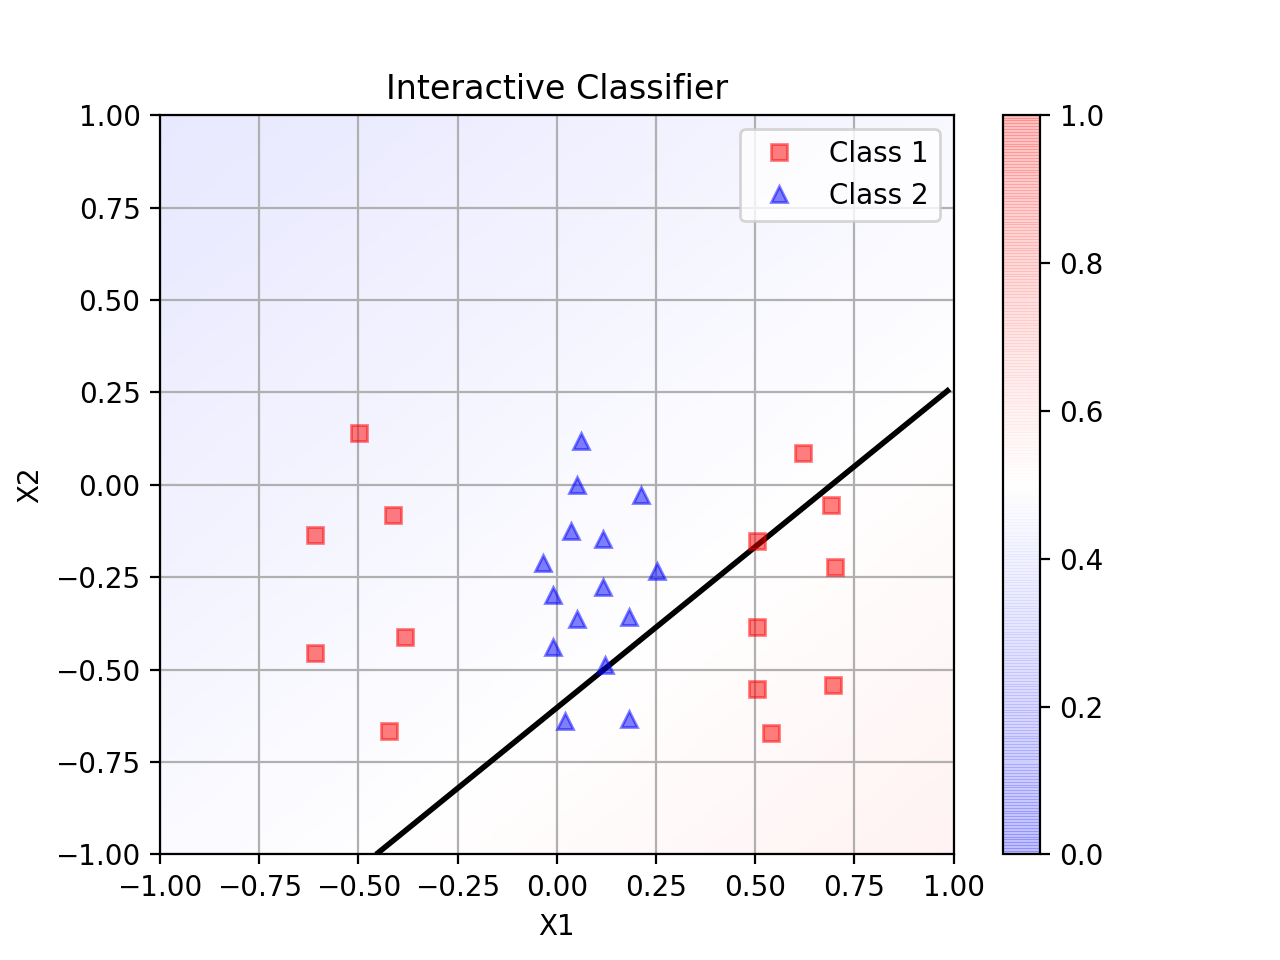

{'name': 'value', 'old': '1', 'new': '2', 'owner': RadioButtons(description='Class:', index=1, options=('1', '2'), value='2'), 'type': 'change'}
2
{'name': 'value', 'old': '2', 'new': '1', 'owner': RadioButtons(description='Class:', options=('1', '2'), value='1'), 'type': 'change'}
1
{'name': 'value', 'old': '1', 'new': '2', 'owner': RadioButtons(description='Class:', index=1, options=('1', '2'), value='2'), 'type': 'change'}
2
{'name': 'value', 'old': '2', 'new': '1', 'owner': RadioButtons(description='Class:', options=('1', '2'), value='1'), 'type': 'change'}
1
{'name': 'value', 'old': '1', 'new': '2', 'owner': RadioButtons(description='Class:', index=1, options=('1', '2'), value='2'), 'type': 'change'}
2


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.colors import ListedColormap
from sklearn.externals.six import StringIO  
from subprocess import call
from sklearn import linear_model
from sklearn import svm
import ipywidgets as widgets
from IPython.display import display

import sys
#sys.stdout = open('/dev/stdout', 'w')

import warnings
warnings.filterwarnings('ignore')

%matplotlib notebook

    
def plot2d_data(x,y,data_name,class_names,feature_names,markers=['sr','^b','og']):
    """Plot a 2d data set. x must be an Nx2 array of feature values. 
    y must be a N-long array of label values. data_name is a 
    string giving the name of the data set. The class labels
    must be intergers between 1 and C. class_names must be a 
    list of strings naming the classes. feature_names must be a
    list of strings naming the features."""

    for i in 1+np.arange(len(class_names)):
          plt.plot(x[y==i,0],x[y==i,1],markers[i-1], alpha=0.5);


def interactive_classifier(clf):
    """Define an interactive classifier. clf can be any classifier
    object that implements predict. fig must be a figure handle
    to a 2d data plot created using plot2d_data(). The function
    applies the classifier to the points that you click on and
    plots them in the specified figure.
    """
    #Define the event handler
    def onclick(event):
        global N
        global x_tr
        global y_tr
        global dclass
        global clf
        markers=['sr','^b','og']
        #Get the point that is clicked on
        x = np.array([event.xdata, event.ydata])
        
        x_tr[N,:]=x
        y_tr[N]=dclass
        N=N+1
               
        plt.clf()
        plot_prob_classifier(clf,x_tr[:N,:],y_tr[:N],"Interactive Classifier",["Class 1","Class 2"],["X1","X2"])
    
    #Create a callback to connect the handler to mouse click events 
    cid = fig.canvas.mpl_connect('button_press_event', onclick)


#Define classifier plotting function
def plot_prob_classifier(clf,x,y,data_name,class_names,feature_names,show_data=True,markers=['sr','^b','og']):  


    #Prepare grid for plotting decision surface
    gx1, gx2 = np.meshgrid(np.arange(-1, 1,1/100.0 ),np.arange(-1, 1,1/100.0))

    gx1l = gx1.flatten()
    gx2l = gx2.flatten()
    gx   = np.vstack((gx1l,gx2l)).T    
    
    if(N>0):
        plot2d_data(x,y,data_name,class_names,feature_names,markers=markers)
    
    if( N>0 and np.any(y==1) and np.any(y==2)):
        #Compute a prediction for every point in the grid
        clf.fit(x,y)
        gyhat = clf.predict_proba(gx)[:,0]
        gyhat = gyhat.reshape(gx1.shape)
        contours = plt.contour(gx1, gx2, gyhat, levels=[0.5], linewidths=2,
                           linetypes='-',colors=["k"])  
        plt.imshow(gyhat, interpolation='nearest',
               extent=(-1, 1, -1, 1), aspect='auto',
               origin='lower', cmap=plt.cm.bwr, alpha=0.25)
 
    else:
        gx1[:]=0.5
        plt.imshow(gx1, interpolation='nearest',
               extent=(-1, 1, -1, 1), aspect='auto',
               origin='lower', cmap=plt.cm.bwr, alpha=0.25)
                    

    plt.legend(class_names)
    plt.clim(0,1)
    plt.xlim((-1,1))
    plt.ylim((-1,1))
    plt.title(data_name) 
    plt.grid(True)
    plt.xlabel(feature_names[0]);
    plt.ylabel(feature_names[1]);
    plt.colorbar()


dclass=1
wclass = widgets.RadioButtons(
    options=['1', '2'],
    description='Class:',
    disabled=False
)

model_names = ['Logisitic Regression','SVM']
clf1 = linear_model.LogisticRegression(C=1e10)
clf2 = svm.SVC(kernel='rbf',gamma=10, C=100, probability=True)
models = {model_names[0]:clf1}#, model_names[1]:clf2}

model = model_names[0]
clf   = models[model_names[0]]
wmodel = widgets.RadioButtons(
    options=model_names,
    description='Model:',
    disabled=False
)

wlambda = widgets.FloatSlider(
    value=0,
    min=0,
    max=1.0,
    step=0.01,
    description='lambda:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

wbutton = widgets.Button(description="Reset")


#items = [wclass, wmodel,wbutton]
items = [wclass, wlambda, wbutton]
whbox = widgets.HBox(items)  

def on_wmodel_change(change):
    global clf
    global fig
    global models
    model_name = change.new
    clf = models[model_name]
    plt.clf()
    plot_prob_classifier(clf,x_tr[:N,:],y_tr[:N],"Interactive Classifier",["Class 1","Class 2"],["F1","F2"])

    
wmodel.observe(on_wmodel_change, names='value')

def on_wclass_change(change):
    global dclass
    print(change)
    dclass = int(change.new)
    print(dclass)
    
wclass.observe(on_wclass_change, names='value')


def on_wbutton_clicked(b):
    global fig
    init_classifier(fig)
    
wbutton.on_click(on_wbutton_clicked)

def on_lambda_change(change):
    global clf
    global fig
    global models
    lam = change.new
    model_name = change.new
    clf = linear_model.LogisticRegression(C=1.0/(lam+1e-10))
    plt.clf()
    plot_prob_classifier(clf,x_tr[:N,:],y_tr[:N],"Interactive Classifier",["Class 1","Class 2"],["F1","F2"])

wlambda.observe(on_lambda_change, names='value')

def init_classifier(fig):
    global N
    global x_tr
    global y_tr
    N=0
    x_tr = np.zeros((100,2))
    y_tr = np.zeros(100)
    fig.clf()
    plot_prob_classifier(clf,x_tr[:N,:],y_tr[:N],"Interactive Classifier",["Class 1","Class 2"],["X1","X2"])
    

fig = plt.figure()
init_classifier(fig)
interactive_classifier(fig)
display(whbox)
